# Project 1: SAT & ACT Analysis

## Problem Statement

We look at collective participation rates between ACT and SAT testing results between individual states. Our goal is to identify patterns in participation rates and identify possible influences a College Board can leverage to increase High School senior participation.

## Executive Summary:
States found heavy preferential treatment between SAT and ACT scores. Participation rates are consistently skewed in favor of one or the other. Further investigation after identifying a large swing in Colorado from ACT's to SAT's in 2018, we find that State School Boards coordinate directly with owners of SAT/ACT and can directly influence participation by setting high-school requirements to take the test, state-wide.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

# Library Imports

Here we import: 
-  `numpy` as `py` for running mathematical and statistcal methods/functions
- `seaborn` as `sns` for additional data plotting and KDE
-  `matplotlib.pyplot` as `plt` for plotting our data
-  `pandas` as `pd` for data set handling

In [24]:
#Imports: numpy, seaborn, matplotlib.pyplot, pandas
import numpy as np                #sets call as np
import seaborn as sns             #sets call as sns
import matplotlib.pyplot as plt   #sets call as plt
import pandas as pd               #sets call as pd

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [25]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')   #sets a variable that reads SAT csv
act_2017 = pd.read_csv('../data/act_2017.csv')   #sets a variable that reads ACT csv

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [26]:
sat_2017.head(10)  # displays first 10 rows of data set sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [27]:
act_2017.head(10)  # displays first 10 rows of data set act_2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [28]:
print('act_2017 shape: ' + str(act_2017.shape)) #verifying data size
print('sat_2017 shape: ' + str(sat_2017.shape)) #verifying data size

act_2017 shape: (52, 7)
sat_2017 shape: (51, 5)


In [29]:
print('act_2017 datatypes:\n ' + str(act_2017.dtypes) + '\n') #comparing dtypes
print('sat_2017 datatypes:\n ' + str(sat_2017.dtypes) + '\n') #comparing dtypes

act_2017 datatypes:
 State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

sat_2017 datatypes:
 State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object



In [30]:
# converts series for State into list for parsing 
act2017 = list(act_2017["State"])
sat2017 = list(sat_2017["State"])


# we see a shape difference and want to verify what values differ between
##  each each State series in ACT2017 and SAT2017

# checks ACT against SAT and reports any unique values
act_excl2017 = [i for i in act2017 if i not in sat2017]

# checks SAT against ACT and reports any unique values
sat_excl2017 = [i for i in sat2017 if i not in act2017] 

In [31]:
print(f"SAT Exclusives 2017, {sat_excl2017}") #print our findings
print(f"ACT Exclusives 2017, {act_excl2017}") #print our findings

SAT Exclusives 2017, []
ACT Exclusives 2017, ['National']


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

#### Answer: <br>
- Both sets include Participation rates as `objects` which we may need to convert into floats for exploring
- ACT scores include a row for the National Average
 - I will likely remove this in favor of generating this value ourselves for all datasets
- Both sets use different scoring systems
 - SAT's combine reading and writing
 - ACT's keep these separate
- SCORE RANGES:
  - ACT: 1-36 (36 best)
   - Composite: Average of 4 test scores
   - Tests: 
    - English 
    - Math
    - Reading
    - Science
  - SAT: 200-800 (800 best)
   - Total: 400-1600; combines 2 test scores
   - Tests:
    - Math
    - Combined Reading and Writing ('Evidence Based Reading and Writing')

#### 4a. Does the data look complete? 

#### Answer: 
As far as reporting scores and participation rates there are no apparent missing data points I'd look to pursue. <br> At most I'd look to see what additional or external data we could take into account that influences participation rates. <br>
##### As of right now:
- I'm looking to compare state participation rates and differences between SAT and ACT tests
- Look for trends between the two
- Check if scoring methodology has any influence on participation
- Check participation rates vs average score in relation to each other (ACT vs SAT)

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### Answer:

Here are the score ranges once more. Checking the descriptive statistics (more specifically: `max` and `min`) we can see that there are no scores outside of these ranges.
- SCORE RANGES:
  - ACT: 1-36 (36 best)
   - Composite: Average of 4 test scores
   - Tests: 
    - English 
    - Math
    - Reading
    - Science
  - SAT: 200-800 (800 best)
   - Total: 400-1600; combines 2 test scores
   - Tests:
    - Math
    - Combined Reading and Writing ('Evidence Based Reading and Writing')

In [32]:
sat_2017.describe() # 200 >= score =<800

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [33]:
act_2017.describe() # 1 >= score =< 36

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [34]:
act = list(act_2017["State"])   #generates a list we can iterate for verifying states
sat = list(sat_2017["State"])   #we are doing this because the shape was off, this also 
                                #ensures that each state name matches the other in our dataset

act_excl = [i for i in act if i not in sat]  #list comp any states contained that SAT doesn't
sat_excl = [i for i in sat if i not in act]  #list comp any states contained that ACT doesn't

#prints our findings
print(f"SAT Exclusives, {sat_excl}")
print(f"ACT Exclusives, {act_excl}")

SAT Exclusives, []
ACT Exclusives, ['National']


#### Row drop
of `National` to ensure `.describe()` functions include only participant US States.

In [35]:
act_2017.drop([0], axis = 0, inplace = True)


In [36]:
act_2017 = act_2017.reset_index() #reset the index for when we mege dataframes

In [37]:
act_2017.head(2) #verify index is reset

,index,State,Participation,English,Math,Reading,Science,Composite
0,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
1,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8


I've removed the `National` region in ACTs, as this will interfere with descriptive analysis and will be determined in [EDA](#Exploratory-Data-Analysis). <br> This was completed before running the descriptive statistics.

Finally, we lower-case all the `State` series columns using `series.str.lower()` 

In [38]:
act_2017['State'] = act_2017['State'].str.lower()
act_2017.head(2)

,index,State,Participation,English,Math,Reading,Science,Composite
0,1,alabama,100%,18.9,18.4,19.7,19.4,19.2
1,2,alaska,65%,18.7,19.8,20.4,19.9,19.8


In [39]:
sat_2017['State'] = sat_2017['State'].str.lower()
sat_2017.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,alabama,5%,593,572,1165
1,alaska,38%,547,533,1080


#### 5. What are your data types? 
Display the data types of each feature. 

In [40]:
print('act_2017 datatypes:\n ' + str(act_2017.dtypes) + '\n') #comparing dtypes
print('sat_2017 datatypes:\n ' + str(sat_2017.dtypes) + '\n') #comparing dtypes

act_2017 datatypes:
 index              int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

sat_2017 datatypes:
 State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object



What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

#### Answer:
- SAT 2017 scores are reported as integers, we would want to convert these to floats
 - this allows us to incorporate `nan` values in the future, if needed
 - this also aligns the data type for tests to match ACT scores
- ACT 2017 scores are all `float64`'s, however, `Composite` is listed as `object`.
 - We will want to convert composite to float and verify why this reported as object
  - either they are just # as `strings` or we have a dirty value

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

##### 2 functions:
- I creaeted two functions, one that will update Participation to float as well as convert the percentage value (n/100) <br>
- The second function will simply .apply float types to the specified columns

In [41]:
def participation_convert(x):
    x['Participation'] = x['Participation'].str.rstrip('%').astype('float')/100.0
#https://stackoverflow.com/questions/5306756/how-to-print-a-percentage-value-in-python
#https://stackoverflow.com/questions/49415175/python-convert-number-expressed-as-percentage-to-decimal
#https://www.geeksforgeeks.org/python-string-strip-2/

In [42]:
participation_convert(act_2017) # convert participation values for 2017 act scores to float
participation_convert(sat_2017) # convert participation values for 2017 sat scores to float

#### Methodology:
- I researched various percentage conversion methods after looking into column conversions, below is a link to stack overflow which provided thee string used above.
- `str.rstrip()` (`str.lstrip()`) checks and removes leading/tailing string values specified. Here we pass `act_2017['Participation']` and strip all object `'%'` values.
- `.astype('float')` converts thee value to float
- Finally, we divide by 100 so we get the true percentage float value. <br><br>
[Stack Overflow code](https://stackoverflow.com/a/47891276)

In [43]:
#float convert function is from our solution code review of NaN reviews and Intro to Pandas
def float_convert(x):
    try:
        x = float(x)
    except:
        x = np.nan
    return x

- Fix any individual values preventing other columns from being the appropriate type.

In [44]:
act_2017['Composite'] = act_2017['Composite'].apply(float_convert)
sat_2017['Evidence-Based Reading and Writing'] = sat_2017['Evidence-Based Reading and Writing'].apply(float_convert)
sat_2017['Math'] = sat_2017['Math'].apply(float_convert)
sat_2017['Total'] = sat_2017['Total'].apply(float_convert);

- Finish your data modifications by making sure the columns are now typed appropriately.

#### Answer: 
Columns were printed and can be confirmed below with proper naming and dtypes

- Display the data types again to confirm they are correct.

In [45]:
print('act_2017 datatypes:\n ' + str(act_2017.dtypes) + '\n') #comparing dtypes
print('sat_2017 datatypes:\n ' + str(sat_2017.dtypes) + '\n') #comparing dtypes

act_2017 datatypes:
 index              int64
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

sat_2017 datatypes:
 State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object



In [46]:
print('act_2017 shape: ' + str(act_2017.shape)) #verifying data size matches for merge
print('sat_2017 shape: ' + str(sat_2017.shape)) #verifying data size matches for merge

act_2017 shape: (51, 8)
sat_2017 shape: (51, 5)


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [47]:
act_2017.rename(columns={"Math" : "act_2017_math", 
                         "English" : "act_2017_english",
                         "Science" : "act_2017_science",
                         "Reading" : "act_2017_reading",
                         "Composite" : "act_2017_composite",
                         "Participation" : "act_2017_participation",
                         "State" : "state"},
                inplace = True)
act_2017.head(2)

,index,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,1,alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,2,alaska,0.65,18.7,19.8,20.4,19.9,19.8


In [48]:
sat_2017.rename(columns={"Math" : "sat_2017_math", 
                         "Evidence-Based Reading and Writing" : "sat_2017_english",
                         "Total" : "sat_2017_science",
                         "Participation" : "sat_2017_participation",
                         "State" : "state",
                         "Total" : "sat_2017_total"},
                inplace = True)
sat_2017.head(2)

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total
0,alabama,0.05,593.0,572.0,1165.0
1,alaska,0.38,547.0,533.0,1080.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

[Row Drop Method and Code](#Row-drop)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [49]:
combined_2017 = pd.merge(act_2017, #DF on left side
                         sat_2017, #DF merging on right side
                         left_on='state', # key to anchor from left df
                         right_on='state') #key to anchor from right df

# merge comprehension verified [https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html]

In [50]:
combined_2017.head()

,index,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total
0,1,alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0
1,2,alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0
2,3,arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0
3,4,arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0
4,5,california,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0


In [51]:
print('combined_2017 shape: ' + str(combined_2017.shape)) #verifying data size
print('combined_2017 datatypes:\n ' + str(combined_2017.dtypes) + '\n') #comparing dtypes

combined_2017 shape: (51, 12)
combined_2017 datatypes:
 index                       int64
state                      object
act_2017_participation    float64
act_2017_english          float64
act_2017_math             float64
act_2017_reading          float64
act_2017_science          float64
act_2017_composite        float64
sat_2017_participation    float64
sat_2017_english          float64
sat_2017_math             float64
sat_2017_total            float64
dtype: object



In [52]:
combined_2017.drop(['index'], axis = 1, inplace = True)  #removes additional index column 
combined_2017.head(2) #verifies change

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total
0,alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0
1,alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [53]:
combined_2017.to_csv( r'../data/combined_2017.csv') #to_csv outputs new csv to '../data/'

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [54]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')   #sets a variable that reads SAT csv
act_2018 = pd.read_csv('../data/act_2018.csv')   #sets a variable that reads ACT csv

In [55]:
#checking for exclusive states and mis-matched rows
act2018 = list(act_2018["State"])
sat2018 = list(sat_2018["State"])
act_excl2018 = [i for i in act2018 if i not in sat2018]
sat_excl2018 = [i for i in sat2018 if i not in act2018]
print(f"SAT Exclusives 2018, {sat_excl2018}")
print(f"ACT Exclusives 2018, {act_excl2018}")

SAT Exclusives 2018, ['District of Columbia']
ACT Exclusives 2018, ['District of columbia']


In [56]:
act_2018['State'] = act_2018['State'].str.lower()  #updates state column lower-cased strings
act_2018.head(2) #verify change

,State,Participation,Composite
0,alabama,100%,19.1
1,alaska,33%,20.8


In [57]:
sat_2018['State'] = sat_2018['State'].str.lower()  #updates state column lower-cased strings
sat_2018.head(2) #verify change

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,alabama,6%,595,571,1166
1,alaska,43%,562,544,1106


In [58]:
print('act_2018 shape: ' + str(act_2018.shape)) #verifying data size
print('sat_2018 shape: ' + str(sat_2018.shape)) #verifying data size

act_2018 shape: (52, 3)
sat_2018 shape: (51, 5)


In [59]:
act_2018['State'].value_counts() #looking for duplicates as there were no unique columns identified

maine                   2
kansas                  1
vermont                 1
new jersey              1
illinois                1
north dakota            1
idaho                   1
delaware                1
south dakota            1
arizona                 1
washington              1
rhode island            1
massachusetts           1
florida                 1
wyoming                 1
california              1
new hampshire           1
iowa                    1
wisconsin               1
utah                    1
mississippi             1
district of columbia    1
pennsylvania            1
indiana                 1
missouri                1
new york                1
maryland                1
oklahoma                1
connecticut             1
hawaii                  1
alabama                 1
texas                   1
west virginia           1
georgia                 1
nebraska                1
north carolina          1
alaska                  1
south carolina          1
virginia    

In [60]:
act_2018[act_2018['State'] == 'maine'].head() 
#filters and compares Maine entry, confirming it as a double-entry 
#also confirms their entries are equivelant

,State,Participation,Composite
19,maine,7%,24.0
20,maine,7%,24.0


In [61]:
act_2018.drop([19], axis = 0, inplace = True)  #removes indexed row 19 identified as one of the equivelant Maine values
act_2018 = act_2018.reset_index() #resets index to realign data for merge

In [62]:
print('act_2018 shape: ' + str(act_2018.shape)) #verifying data size is correct now
print('sat_2018 shape: ' + str(sat_2018.shape)) #verifying data size is correct now

act_2018 shape: (51, 4)
sat_2018 shape: (51, 5)


In [63]:
print('act_2018 datatypes:\n ' + str(act_2018.dtypes) + '\n') #comparing dtypes to verify which columns to update to float
print('sat_2018 datatypes:\n ' + str(sat_2018.dtypes) + '\n') #comparing dtypes to verify which columns to update to float

act_2018 datatypes:
 index              int64
State             object
Participation     object
Composite        float64
dtype: object

sat_2018 datatypes:
 State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object



In [64]:
participation_convert(act_2018) # convert participation values for 2018 act scores to float
participation_convert(sat_2018) # convert participation values for 2018 sat scores to float

In [65]:
#run float_convert() to ensure data consistency on dtypes reporting ~float
sat_2018['Evidence-Based Reading and Writing'] = sat_2018['Evidence-Based Reading and Writing'].apply(float_convert)
sat_2018['Math'] = sat_2018['Math'].apply(float_convert)
sat_2018['Total'] = sat_2018['Total'].apply(float_convert);

In [66]:
print('act_2018 datatypes:\n ' + str(act_2018.dtypes) + '\n') #confirms dtypes are updated and consistent for act_2018
print('sat_2018 datatypes:\n ' + str(sat_2018.dtypes) + '\n') #confirms dtypes are updated and consistent for sat_2018

act_2018 datatypes:
 index              int64
State             object
Participation    float64
Composite        float64
dtype: object

sat_2018 datatypes:
 State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object



In [67]:
# runs .rename() using dict values to update columns to unique, lower-cased names
act_2018.rename(columns={"Composite" : "act_2018_composite",    
                         "Participation" : "act_2018_participation",
                         "State" : "state"},
                inplace = True)
act_2018.head(2)  #verifies change

,index,state,act_2018_participation,act_2018_composite
0,0,alabama,1.00,19.1
1,1,alaska,0.33,20.8


In [68]:
# runs .rename() using dict values to update columns to unique, lower-cased names
sat_2018.rename(columns={"Math" : "sat_2018_math", 
                         "Evidence-Based Reading and Writing" : "sat_2018_english",
                         "Total" : "sat_2018_science",
                         "Participation" : "sat_2018_participation",
                         "State" : "state",
                         "Total" : "sat_2018_total"},
                inplace = True)
sat_2018.head(2) #verifies change

,state,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total
0,alabama,0.06,595.0,571.0,1166.0
1,alaska,0.43,562.0,544.0,1106.0


In [69]:
combined_2018 = pd.merge(act_2018, #data frame merging on left side
                         sat_2018, #data frame merging on right side
                         left_on='state', # key to anchor from left df(act_2018)
                         right_on='state') #key to anchor from right df(sat_2018)

# merge comprehension verified [https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html]

In [70]:
combined_2018.head(3) #verify combined merge and columns

,index,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total
0,0,alabama,1.00,19.1,0.06,595.0,571.0,1166.0
1,1,alaska,0.33,20.8,0.43,562.0,544.0,1106.0
2,2,arizona,0.66,19.2,0.29,577.0,572.0,1149.0


In [71]:
combined_2018.drop(['index'], axis = 1, inplace = True)  #removes additional index column 
combined_2018.head(2) #verifies change

,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total
0,alabama,1.00,19.1,0.06,595.0,571.0,1166.0
1,alaska,0.33,20.8,0.43,562.0,544.0,1106.0


In [72]:
print('combined_2017 shape: ' + str(combined_2017.shape)) #verifying data size
print('combined_2018 shape: ' + str(combined_2018.shape)) #verifying data size
print('combined_2017 datatypes:\n ' + str(combined_2017.dtypes) + '\n') #comparing dtypes
print('combined_2018 datatypes:\n ' + str(combined_2018.dtypes) + '\n') #comparing dtypes

combined_2017 shape: (51, 11)
combined_2018 shape: (51, 7)
combined_2017 datatypes:
 state                      object
act_2017_participation    float64
act_2017_english          float64
act_2017_math             float64
act_2017_reading          float64
act_2017_science          float64
act_2017_composite        float64
sat_2017_participation    float64
sat_2017_english          float64
sat_2017_math             float64
sat_2017_total            float64
dtype: object

combined_2018 datatypes:
 state                      object
act_2018_participation    float64
act_2018_composite        float64
sat_2018_participation    float64
sat_2018_english          float64
sat_2018_math             float64
sat_2018_total            float64
dtype: object



#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [73]:
final = pd.merge(combined_2017, #data frame merging on left side
                         combined_2018, #data frame merging on right side
                         left_on='state', # key to anchor from left df(act_2018)
                         right_on='state') #key to anchor from right df(sat_2018)

# merge comprehension verified [https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html]

In [74]:
final.head(2)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total
0,alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
1,alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0


In [75]:
final.to_csv( r'../data/final.csv') #to_csv outputs new final.csv to '../data/' directory

In [76]:
final = pd.read_csv('../data/final.csv')


In [77]:
final.drop(['Unnamed: 0'], axis = 1, inplace = True)  #removes additional Unnamed: 0 column 
final.head(2) #verifies change

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total
0,alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
1,alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0


In [78]:
print('final shape: ' + str(final.shape)) #verifying data size
print('final datatypes:\n ' + str(final.dtypes) + '\n') #comparing dtypes

final shape: (51, 17)
final datatypes:
 state                      object
act_2017_participation    float64
act_2017_english          float64
act_2017_math             float64
act_2017_reading          float64
act_2017_science          float64
act_2017_composite        float64
sat_2017_participation    float64
sat_2017_english          float64
sat_2017_math             float64
sat_2017_total            float64
act_2018_participation    float64
act_2018_composite        float64
sat_2018_participation    float64
sat_2018_english          float64
sat_2018_math             float64
sat_2018_total            float64
dtype: object



## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [79]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
act_2017_composite,50.0,21.546000,2.032311,17.80,19.800,21.40,23.600,25.5
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_english,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,547.627451,84.909119,52.00,522.000,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [80]:
from math import sqrt        #import square root function
from statistics import stdev, variance  #we will use this to test our manual function

# Stack overflow user duffymo breaks down 3 functions [Source: https://stackoverflow.com/a/36830767]

def mean(x):                  #sets up mean calculation 
    return sum(x)/len(x)      #mean = sum of values / quantity

def var(x):
    mu = mean(x)         # establishes mu for calculation
    varlist = []         # creates list value for calculating (xi-mu)^2
    for variable in x:   # for loop iterates over each value of x
        varlist.append((variable - mu)**2)  #appends(xi-mu)^2 varlist
    return(sum(varlist)/(len(x)-1)) #returns calculation of variance
        

def standard_dev(x):     # finally, we calculate the squareroot of the summed variance
    return sqrt(var(x))  # and return the values

In [81]:
test = [1, 2, 3, 4, 5]

standard_dev(test) == np.std(test, ddof=1)

# ddof comprehension: https://honingds.com/blog/python-standard-deviation/

True

In [82]:
final.dtypes

state                      object
act_2017_participation    float64
act_2017_english          float64
act_2017_math             float64
act_2017_reading          float64
act_2017_science          float64
act_2017_composite        float64
sat_2017_participation    float64
sat_2017_english          float64
sat_2017_math             float64
sat_2017_total            float64
act_2018_participation    float64
act_2018_composite        float64
sat_2018_participation    float64
sat_2018_english          float64
sat_2018_math             float64
sat_2018_total            float64
dtype: object

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [83]:
sd = {'act_2017_participation' : standard_dev(final['act_2017_participation']),
      'act_2017_english' : standard_dev(final['act_2017_english']),
      'act_2017_math' : standard_dev(final['act_2017_math']),
      'act_2017_reading' : standard_dev(final['act_2017_reading']),
      'act_2017_science' : standard_dev(final['act_2017_science']),
      'act_2017_composite' : standard_dev(final['act_2017_composite']),
      'sat_2017_participation' : standard_dev(final['sat_2017_participation']),
      'sat_2017_english' : standard_dev(final['sat_2017_english']),
      'sat_2017_math' : standard_dev(final['sat_2017_math']),
      'sat_2017_total'  : standard_dev(final['sat_2017_total']),
      'act_2018_participation' : standard_dev(final['act_2018_participation']),
      'act_2018_composite' : standard_dev(final['act_2018_composite']),
      'sat_2018_participation' : standard_dev(final['sat_2018_participation']),
      'sat_2018_english' : standard_dev(final['sat_2018_english']),
      'sat_2018_math' : standard_dev(final['sat_2018_math']),
      'sat_2018_total' : standard_dev(final['sat_2018_total'])}

In [84]:
sd

{'act_2017_participation': 0.32140842015886834,
 'act_2017_english': 2.35367713980303,
 'act_2017_math': 1.9819894936505533,
 'act_2017_reading': 2.0672706264873146,
 'act_2017_science': 3.182462975155452,
 'act_2017_composite': nan,
 'sat_2017_participation': 0.35276632270013036,
 'sat_2017_english': 45.66690138768932,
 'sat_2017_math': 84.90911865855486,
 'sat_2017_total': 92.49481172519046,
 'act_2018_participation': 0.34037084734960815,
 'act_2018_composite': 2.111583366510896,
 'sat_2018_participation': 0.37314256330391965,
 'sat_2018_english': 47.50262737831599,
 'sat_2018_math': 47.77262322095955,
 'sat_2018_total': 94.15508275097599}

In [85]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
act_2017_composite,50.0,21.546000,2.032311,17.80,19.800,21.40,23.600,25.5
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_english,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,547.627451,84.909119,52.00,522.000,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

#### Answer:
- Imports and verifications are included in code above. 
- code is annotated with process
- All values matched both describe(transposed) and np.std provided we corrected degrees of freedom.
 - we set ddof = 1 to follow the n-1 format. Otherwise np.std defaults to simply n.

##### Documentation for ddof:
ddof : int, optional
    Means Delta Degrees of Freedom.  The divisor used in calculations
    is ``N - ddof``, where ``N`` represents the number of elements.
    By default `ddof` is zero. <br>
    [Source : 2 Ways to Calc Stdev](#https://honingds.com/blog/python-standard-deviation/)

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [86]:
final.filter(['state', 'act_2017_participation']).sort_values('act_2017_participation', ascending = False).head(20)

,state,act_2017_participation
0,alabama,1.00
17,kentucky,1.00
49,wisconsin,1.00
44,utah,1.00
42,tennessee,1.00
40,south carolina,1.00
36,oklahoma,1.00
33,north carolina,1.00
28,nevada,1.00
26,montana,1.00


##### Observations:
- Middle-belt states show heavy participation rate in ACT 2017 scores
- A surprising 20 States have 100% participation, we will look into state laws and preferences later to further our understanding of this

In [87]:
final.filter(['state', 'act_2018_participation']).sort_values('act_2018_participation', ascending = False).head(20)

,state,act_2018_participation
0,alabama,1.00
17,kentucky,1.00
49,wisconsin,1.00
44,utah,1.00
42,tennessee,1.00
40,south carolina,1.00
36,oklahoma,1.00
35,ohio,1.00
33,north carolina,1.00
28,nevada,1.00


##### Observations:
- Here we observe the same trend of middle-belt states holding consistent 100% participation rates
- A surprising 20 States have 100% participation, we will look into state laws and preferences later to further our understanding of this

In [88]:
final.filter(['state', 'sat_2017_participation']).sort_values('sat_2017_participation', ascending = False).head(20)

,state,sat_2017_participation
8,district of columbia,1.00
22,michigan,1.00
6,connecticut,1.00
7,delaware,1.00
29,new hampshire,0.96
19,maine,0.95
12,idaho,0.93
9,florida,0.83
21,massachusetts,0.76
39,rhode island,0.71


##### Observations:
- Unlike ACT's, the SAT's show a larger imbalance of participation rates.
- Participation drops below 90% after only 4 states
- Participation hits 60% by our 20th state

In [89]:
final.filter(['state', 'sat_2018_participation']).sort_values('sat_2018_participation', ascending = False).head(20)

,state,sat_2018_participation
5,colorado,1.00
6,connecticut,1.00
7,delaware,1.00
22,michigan,1.00
12,idaho,1.00
19,maine,0.99
13,illinois,0.99
39,rhode island,0.97
29,new hampshire,0.96
8,district of columbia,0.92


##### Observations:
- Similar to 2017 SAT's consistently show low participation rates, hitting low 60% by our 20th state. 
- Washington DC stands out with a high participation here compared to not making top 20 ACT list.

In [90]:
final.filter(['state', 'act_2017_composite']).sort_values('act_2017_composite', ascending = False).head(20)

,state,act_2017_composite
29,new hampshire,25.5
21,massachusetts,25.4
6,connecticut,25.2
19,maine,24.3
32,new york,24.2
8,district of columbia,24.2
22,michigan,24.1
7,delaware,24.1
39,rhode island,24.0
30,new jersey,23.9


##### Observations:
- Nothing too particularly interesting by itself here
- State Average Totals are higher here, compared to previous participation rates with the Middle Belt taking top 10
 - Herer we see some a priority of Northeastern States scoring a better consistent average

In [91]:
final.filter(['state', 'act_2018_composite']).sort_values('act_2018_composite', ascending = False).head(20)

,state,act_2018_composite
6,connecticut,25.6
21,massachusetts,25.5
29,new hampshire,25.1
32,new york,24.5
22,michigan,24.2
39,rhode island,24.2
45,vermont,24.1
19,maine,24.0
13,illinois,23.9
5,colorado,23.9


##### Observations:
- These scores appear consistent with 2017 findings

In [92]:
final.filter(['state', 'sat_2017_total']).sort_values('sat_2017_total', ascending = False).head(20)

,state,sat_2017_total
23,minnesota,1295.0
49,wisconsin,1291.0
15,iowa,1275.0
25,missouri,1271.0
16,kansas,1260.0
34,north dakota,1256.0
27,nebraska,1253.0
17,kentucky,1247.0
24,mississippi,1242.0
44,utah,1238.0


##### Observations:
- with the total possible sat score 1600, I'm inclined to investigate previous SAT scores and higher national averages

In [93]:
final.filter(['state', 'sat_2018_total']).sort_values('sat_2018_total', ascending = False).head(20)

,state,sat_2018_total
23,minnesota,1298.0
49,wisconsin,1294.0
34,north dakota,1283.0
15,iowa,1265.0
16,kansas,1265.0
25,missouri,1262.0
50,wyoming,1257.0
27,nebraska,1252.0
17,kentucky,1248.0
41,south dakota,1240.0


##### Observations:
- no changes or distinct changes for me here

In [94]:
final.set_index('state', inplace = True)

##### Observations:
- We are cleaning our data table for boolean logic and filtering

In [95]:
final.head()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total
state,,,,,,,,,,,,,,,,
alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0
arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0,0.66,19.2,0.29,577.0,572.0,1149.0
arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0,1.00,19.4,0.05,592.0,576.0,1169.0
california,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0,0.27,22.7,0.60,540.0,536.0,1076.0


##### Observations:
- Index saved and looks clean

In [96]:
final.loc[final['act_2017_participation'] > 0.5, ['act_2017_participation', 'act_2018_participation']].head()

,act_2017_participation,act_2018_participation
state,,
alabama,1.00,1.00
alaska,0.65,0.33
arizona,0.62,0.66
arkansas,1.00,1.00
colorado,1.00,0.30


##### Observations:
- Alabama and Arkansas have excellent participation rates
- Colorado dropped significantly by 2018

In [97]:
final.loc[((final['act_2017_participation'] == 1.0) 
        & (final['act_2018_participation'] != 1.0))
        | ((final['sat_2017_participation'] == 1.0)
        & (final['sat_2018_participation'] != 1.0)),
          ['act_2017_participation',
           'act_2018_participation',
           'sat_2017_participation',
           'sat_2018_participation']]

,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation
state,,,,
colorado,1.00,0.30,0.11,1.00
district of columbia,0.32,0.32,1.00,0.92
minnesota,1.00,0.99,0.03,0.04


##### Observations:
- Washington DC and Minnesota stay preferential towards SAT/ACT respectively
- Colorado, however, shows a massive flip going from 100%/30% favoring ACT's in 2017, to 11%/100% in full swing to SAT's.

In [98]:
final.loc[((final['act_2017_participation'] > 0.5) 
        & (final['act_2018_participation'] > 0.5)),
          ['act_2017_participation',
           'act_2018_participation',
           'sat_2017_participation',
           'sat_2018_participation']]

,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation
state,,,,
alabama,1.00,1.00,0.05,0.06
arizona,0.62,0.66,0.30,0.29
arkansas,1.00,1.00,0.03,0.05
florida,0.73,0.66,0.83,0.56
georgia,0.55,0.53,0.61,0.70
hawaii,0.90,0.89,0.55,0.56
iowa,0.67,0.68,0.02,0.03
kansas,0.73,0.71,0.04,0.04
kentucky,1.00,1.00,0.04,0.04


##### Observations:
- As expected, with the exception of 5 states, ACT 2017/2018 states with over 50% participation rate both years fail to break 50% participation for SAT's respectively.
- There are consistent 100% participations across the states. Over 50% of the states met 100% participation rate between the two years.

In [99]:
final.loc[((final['sat_2017_participation'] > 0.5)
        & (final['sat_2018_participation'] > 0.5)),
          ['act_2017_participation',
           'act_2018_participation',
           'sat_2017_participation',
           'sat_2018_participation']]

,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation
state,,,,
california,0.31,0.27,0.53,0.60
connecticut,0.31,0.26,1.00,1.00
delaware,0.18,0.17,1.00,1.00
district of columbia,0.32,0.32,1.00,0.92
florida,0.73,0.66,0.83,0.56
georgia,0.55,0.53,0.61,0.70
hawaii,0.90,0.89,0.55,0.56
idaho,0.38,0.36,0.93,1.00
indiana,0.35,0.32,0.63,0.63


##### Observations:
- SAT's with consistent 50% participation rate between 2017 and 2018 show less full participation than ACT's.
 - Only 4 states each year within this category meet 100%, with 3 of those meeting 100% participation both years.
  - Connecticut
  - Delaware
  - Michigan

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [100]:
final.corr()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total
act_2017_participation,1.000000,-0.843501,-0.861114,-0.866620,-0.304992,-0.857712,-0.841234,0.716153,0.507670,0.701477,0.918875,-0.780381,-0.756479,0.522593,0.555406,0.545179
act_2017_english,-0.843501,1.000000,0.967803,0.985999,0.403456,0.990776,0.686889,-0.461345,-0.345342,-0.441947,-0.799093,0.934716,0.679643,-0.347978,-0.365787,-0.361303
act_2017_math,-0.861114,0.967803,1.000000,0.979630,0.412318,0.990382,0.710697,-0.486126,-0.340906,-0.454116,-0.815031,0.934624,0.696294,-0.355133,-0.340094,-0.351847
act_2017_reading,-0.866620,0.985999,0.979630,1.000000,0.401097,0.995075,0.705352,-0.488441,-0.363099,-0.466558,-0.815108,0.932338,0.680380,-0.363354,-0.374075,-0.373195
act_2017_science,-0.304992,0.403456,0.412318,0.401097,1.000000,0.408670,0.248553,-0.135461,0.594714,-0.121783,-0.311428,0.449338,0.247464,-0.123253,-0.114013,-0.119985
act_2017_composite,-0.857712,0.990776,0.990382,0.995075,0.408670,1.000000,0.691551,-0.463164,-0.340502,-0.437607,-0.809504,0.940836,0.679991,-0.341108,-0.344287,-0.347138
sat_2017_participation,-0.841234,0.686889,0.710697,0.705352,0.248553,0.691551,1.000000,-0.874326,-0.566558,-0.867540,-0.791925,0.644778,0.874763,-0.666313,-0.686941,-0.684556
sat_2017_english,0.716153,-0.461345,-0.486126,-0.488441,-0.135461,-0.463164,-0.874326,1.000000,0.628405,0.996661,0.700499,-0.446705,-0.818925,0.814096,0.865909,0.849798
sat_2017_math,0.507670,-0.345342,-0.340906,-0.363099,0.594714,-0.340502,-0.566558,0.628405,1.000000,0.632648,0.469864,-0.271587,-0.528102,0.487915,0.537222,0.518742
sat_2017_total,0.701477,-0.441947,-0.454116,-0.466558,-0.121783,-0.437607,-0.867540,0.996661,0.632648,1.000000,0.685297,-0.421317,-0.806796,0.810068,0.875601,0.852727


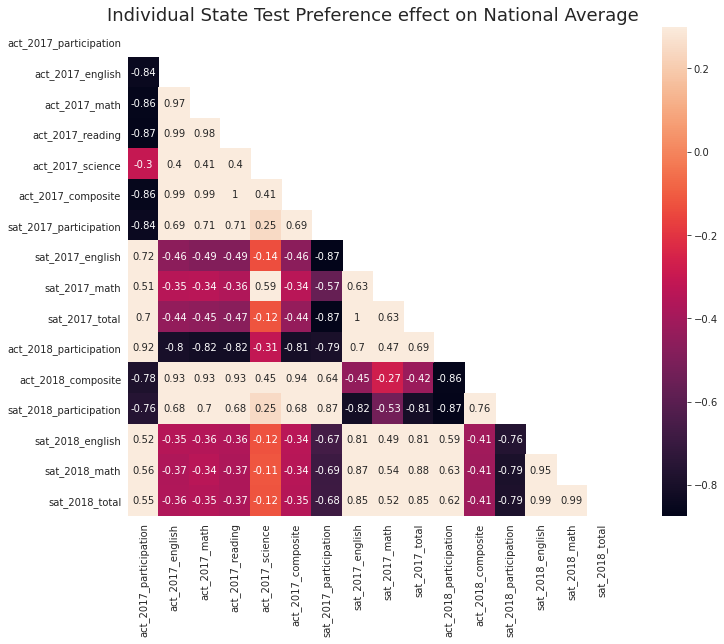

In [101]:
## This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html
 # and from our Lecture Study Notebooks
# Establish size of figure.
plt.figure(figsize=(16,9))

# establishes correlation and sets to variable
corr = final.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plots our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, 
                mask=mask, 
                vmax=.3, 
                square=True, 
                annot=True)

plt.title("Individual State Test Preference effect on National Average", fontsize = 18);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [153]:
#project starter code used
#lesson solution templates used to set and test plot values
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, vmax):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, 
                           ncols=2, 
                           figsize=(16,9)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 12) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set(xlabel = list_of_xlabels[i])
        ax[i].vlines(x = np.mean(dataframe[column]),
                    ymin = 0,
                    ymax = vmax[i],
                    color = 'green',
                    lw = 5)
    plt.tight_layout();
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

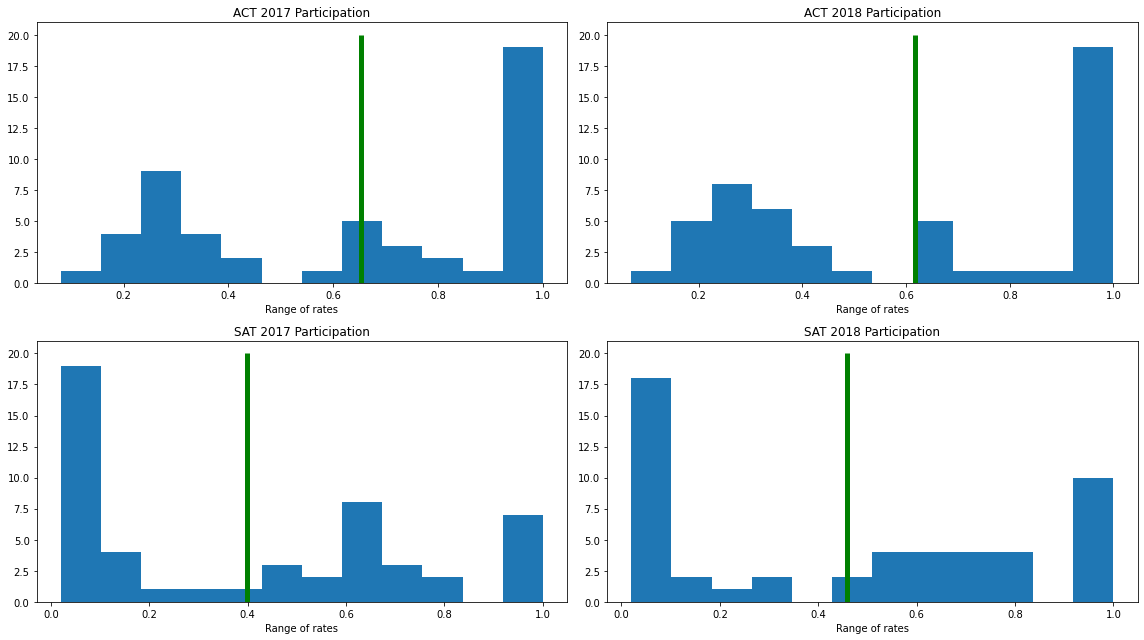

In [155]:
# Participation rates for SAT & ACT
part_cols = ['act_2017_participation', 
             'act_2018_participation', 
             'sat_2017_participation', 
             'sat_2018_participation']
part_titles = ['ACT 2017 Participation', 
               'ACT 2018 Participation', 
               'SAT 2017 Participation', 
               'SAT 2018 Participation']
part_xlabel = ['Range of rates', 
               'Range of rates', 
               'Range of rates', 
               'Range of rates']
part_vlines = [20, 20, 20, 20]
subplot_histograms(final, part_cols, part_titles, part_xlabel, part_vlines)

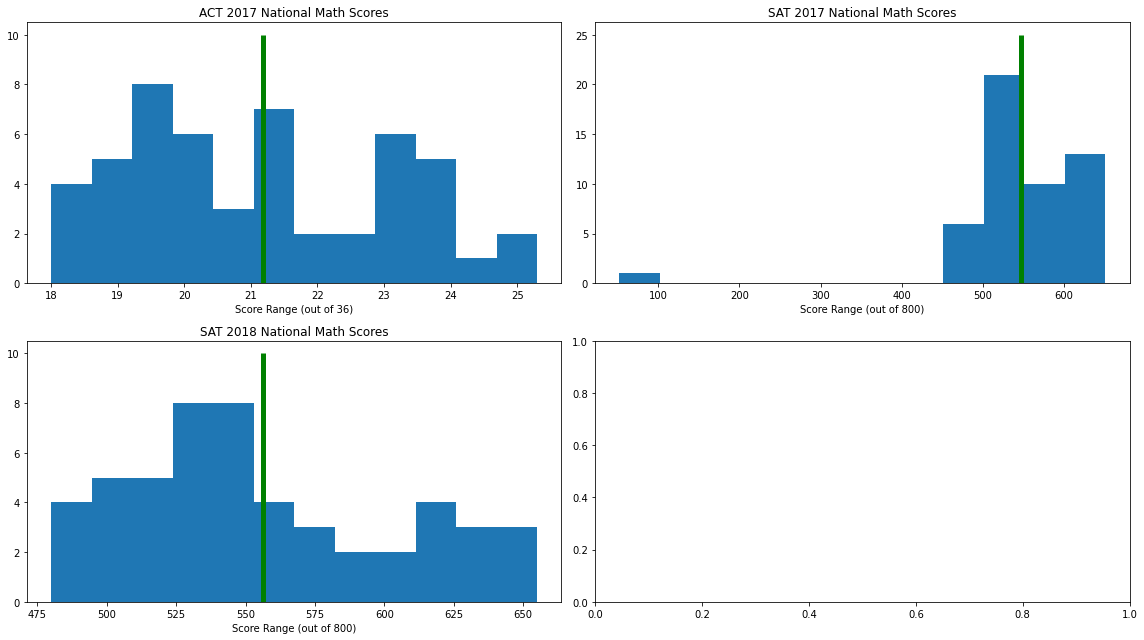

In [156]:
# Math scores for SAT & ACT
part_cols = ['act_2017_math',  
             'sat_2017_math', 
             'sat_2018_math']
part_titles = ['ACT 2017 National Math Scores',
               'SAT 2017 National Math Scores', 
               'SAT 2018 National Math Scores']
part_xlabel = ['Score Range (out of 36)', 
               'Score Range (out of 800)', 
               'Score Range (out of 800)',]
part_vlines = [10, 25, 10]
subplot_histograms(final, part_cols, part_titles, part_xlabel, part_vlines)

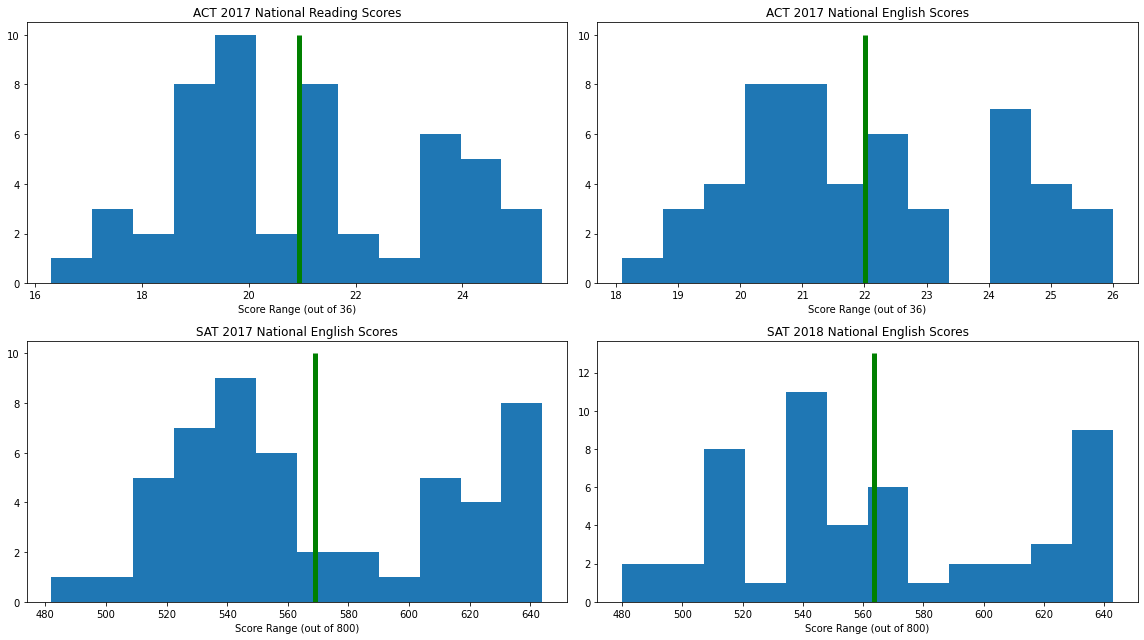

In [157]:
# Reading/verbal scores for SAT & ACT
part_cols = ['act_2017_english',  
             'act_2017_reading', 
             'sat_2017_english',  
             'sat_2018_english']
part_titles = ['ACT 2017 National Reading Scores',
               'ACT 2017 National English Scores', 
               'SAT 2017 National English Scores', 
               'SAT 2018 National English Scores',]
part_xlabel = ['Score Range (out of 36)', 
               'Score Range (out of 36)', 
               'Score Range (out of 800)', 
               'Score Range (out of 800)',]
part_vlines = [10, 10, 10, 13]
subplot_histograms(final, part_cols, part_titles, part_xlabel, part_vlines)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


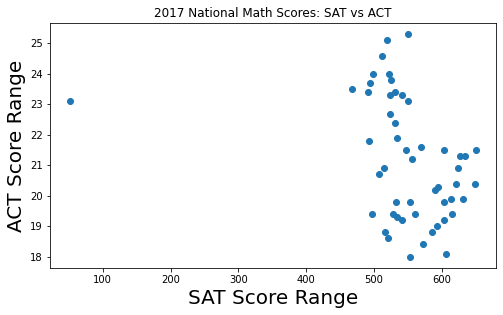

In [161]:
#SAT vs. ACT math scores for 2017
# Establish the size of the figure.
# project starter code used
# lesson solution templates used to set and test plot values
plt.figure(figsize=(8, 4.5))

# Create scatterplot of high prices versus volume.
plt.scatter(final['sat_2017_math'],   # x variable
            final['act_2017_math']) # y variable

plt.title("2017 National Math Scores: SAT vs ACT")
plt.xlabel("SAT Score Range", fontsize = 20)
plt.ylabel("ACT Score Range", fontsize = 20);

In [ ]:
#SAT vs. ACT verbal/reading scores for 2017
# Establish the size of the figure.
# project starter code used
# lesson solution templates used to set and test plot values
plt.figure(figsize=(8, 4.5))

# Create scatterplot of high prices versus volume.
plt.scatter(final['sat_2017_english'],   # x variable
            final['act_2017_english']) # y variable

plt.title("2017 National English Scores: SAT vs ACT")
plt.xlabel("SAT Score Range", fontsize = 20)
plt.ylabel("ACT Score Range", fontsize = 20);

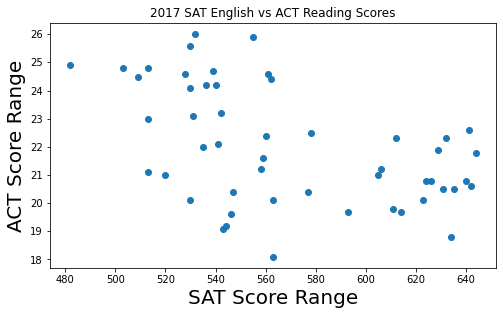

In [163]:
#SAT vs. ACT verbal/reading scores for 2017
# Establish the size of the figure.
# project starter code used
# lesson solution templates used to set and test plot values

plt.figure(figsize=(8, 4.5))

# Create scatterplot of high prices versus volume.
plt.scatter(final['sat_2017_english'],   # x variable
            final['act_2017_reading']) # y variable

plt.title("2017 SAT English vs ACT Reading Scores")
plt.xlabel("SAT Score Range", fontsize = 20)
plt.ylabel("ACT Score Range", fontsize = 20);

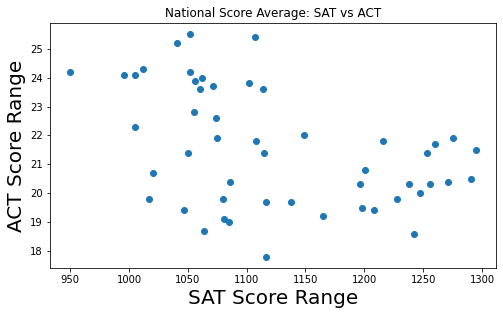

In [164]:
#SAT vs. ACT verbal/reading scores for 2017
# Establish the size of the figure.
# project starter code used
# lesson solution templates used to set and test plot values

plt.figure(figsize=(8, 4.5))

# Create scatterplot of high prices versus volume.
plt.scatter(final['sat_2017_total'],   # x variable
            final['act_2017_composite']) # y variable

plt.title("National Score Average: SAT vs ACT")
plt.xlabel("SAT Score Range", fontsize = 20)
plt.ylabel("ACT Score Range", fontsize = 20);

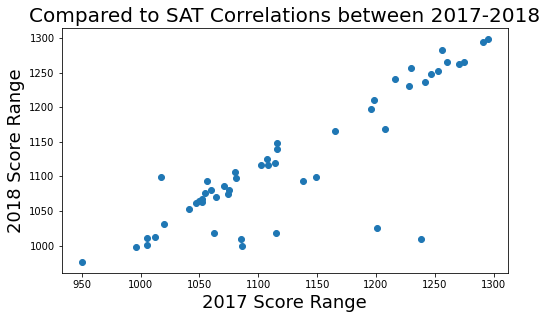

In [190]:
#Total scores for SAT 2017 vs. 2018
# Establish the size of the figure.
# project starter code used
# lesson solution templates used to set and test plot values

plt.figure(figsize=(8, 4.5))

# Create scatterplot of high prices versus volume.
plt.scatter(final['sat_2017_total'],   # x variable
            final['sat_2018_total']) # y variable

plt.title("Compared to SAT Correlations between 2017-2018", fontsize = 20)
plt.xlabel("2017 Score Range", fontsize = 18)
plt.ylabel("2018 Score Range", fontsize = 18);

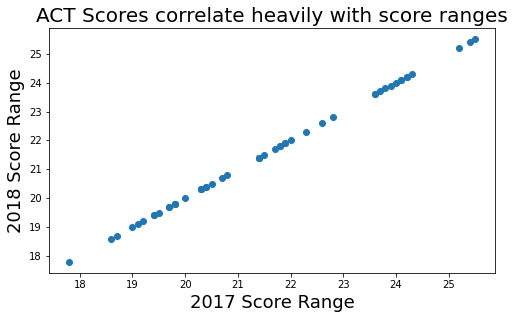

In [189]:
#Composite scores for ACT 2017 vs. 2018
# Establish the size of the figure.
# project starter code used
# lesson solution templates used to set and test plot values
plt.figure(figsize=(8, 4.5))

# Create scatterplot of high prices versus volume.
plt.scatter(final['act_2017_composite'],   # x variable
            final['act_2017_composite']) # y variable

plt.title("ACT Scores correlate heavily with score ranges", fontsize = 20)
plt.xlabel("2017 Score Range", fontsize = 18)
plt.ylabel("2018 Score Range", fontsize = 18);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [191]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
act_2017_composite,50.0,21.546000,2.032311,17.80,19.800,21.40,23.600,25.5
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_english,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,547.627451,84.909119,52.00,522.000,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


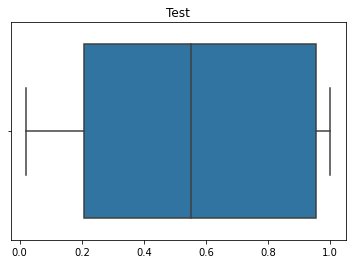

In [178]:
# National Participation Boxplot
sns.boxplot(final[['sat_2017_participation',
                  'sat_2018_participation',
                  'act_2017_participation',
                  'act_2018_participation']]).set_title('2017-2018 ACT/SAT National Participation Boxplot');

In [ ]:
# SAT English Boxplot
sns.boxplot(final[['sat_2017_english',
                  'sat_2018_english',]]).set_title('2017-2018 National SAT English Scores');

In [ ]:
# SAT Math Boxplot
sns.boxplot(final[['sat_2017_math',
                  'sat_2018_math',]]).set_title('2017-2018 National SAT English Scores');

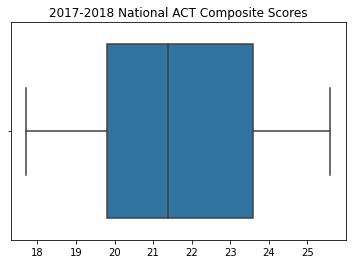

In [182]:
# National ACT Scores Boxplot
sns.boxplot(final[['act_2017_composite',
                   'act_2018_composite']]).set_title('2017-2018 National ACT Composite Scores');

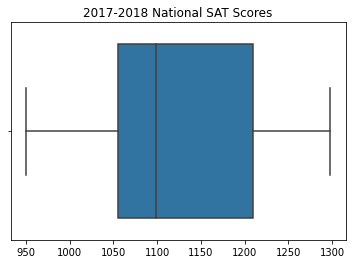

In [187]:
# National SAT Scores Boxplot
sns.boxplot(final[['sat_2017_total',
                   'sat_2018_total']]).set_title('2017-2018 National SAT Scores');

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

##### Colorado 
Colorado showed a large swap in participation between 2017-2018. Upon further research I found that in 2016 only 5,500 students took the SAT's.
- Colorado partnered with the Board of Supervisors standardizing SAT's for 2018
 - [Source: Colorado SAT Adoption](#https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)
 - [Source: Colorado SAT Change](#https://www.testive.com/colorado-sat-change-2017/)
<br><br>
States show heavy influence and preference to either ACT or SAT testing. <br><br>
- College Boards work in conjunction with companies that own SAT/ACT testing
 - As college boards dictate school standards, this aligns with state preferential treatment
 - State College Boards and ACT test owners stand against Colleges that drop ACT/SAT test requirements.
 - Preferential trends are confirmed to continue into 2019
  - [Source : State Preferential](#https://www.collegeraptor.com/getting-in/articles/act-sat/preference-act-sat-state-infographic/)
  - [Source : Common Core Tests](#https://www.edweek.org/ew/articles/2019/02/27/only-16-states-still-share-common-core-tests.html)
  - [Source : State Boards of Education](#https://www.testive.com/state-sat-act/)

##### Alabama
Alabama hit 100% requirements both years. Upon further investigation we confirm it is a high school requirement mandated at the State-level by the State School board.
 - [Source: Alabama Class of 2017](#https://parcalabama.org/alabama-class-of-2017-high-school-graduation-college-and-career-act-and-workkeys-results/)
 
 
###### Arkansas
Arkansas was our Third state in high consistent preference in ACT both years that led into our confirmation of State School Board coordination with owners of ACT/SAT tests and holding direct influence at the High-School level.
 - [Source: State Testing Breakdown](#https://www.edweek.org/ew/section/multimedia/state-testing-an-interactive-breakdown-of-2015-16.html)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

##### TakeAways:
- State School Boards hold heavy weight in student participation,  unlike College Boards which can only dictate their singular school acceptance requirements.
- As colleges also report on student acceptance and typically do not require ACT/SAT's, a College Board should align their SAT/ACT requirements with their State School Board's selection.
- As we saw in Colorado, regardless of College acceptance requirements in regards to SAT/ACT scores: State School Boards pay for these tests and can mandate requirement for High School Graduation.
- Additional Data that would better inform us:
 - State College Board member financial stake in ACT/SAT owners
 - SAT/ACT test owner lobby and influence in each state
 - College Acceptance Rates vs ACT/SAT test requirements


## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: